# Estudo 01 - Deep Learning

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Explorando os Dados

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
imagens_teste.shape

(10000, 28, 28)

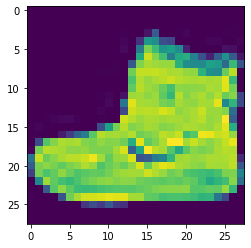

In [ ]:
plt.imshow(imagens_treino[0])

Text(0.5, 1.0, '9')

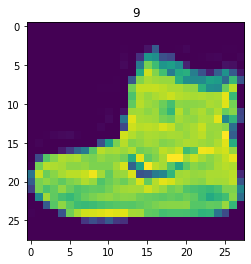

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [ ]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
identificacoes_treino.min()

0

In [ ]:
identificacoes_treino.max()

9

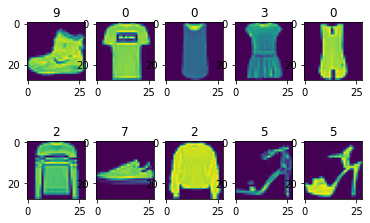

In [ ]:
total_de_classificacoes = 10

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

| Label	| Description|
| -------------  | --- |
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|



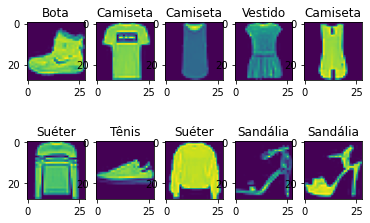

In [ ]:
nome_classificacoes = ['Camiseta', 'Calça', 'Suéter',
                       'Vestido', 'Casaco', 'Sandália',
                       'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

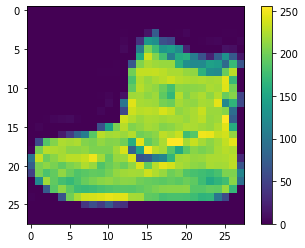

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando, Copilando e Normalizando o Modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2), # 20% das unidades adormecidos
    keras.layers.Dense(10, activation= 'softmax') 
])

modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 17s 10ms/step - loss: 3.1150 - accuracy: 0.6491 - val_loss: 0.8382 - val_accuracy: 0.7228
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8731 - accuracy: 0.6925 - val_loss: 0.6862 - val_accuracy: 0.7822
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.8065 - accuracy: 0.7230 - val_loss: 0.7111 - val_accuracy: 0.7878
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7461 - accuracy: 0.7413 - val_loss: 0.7815 - val_accuracy: 0.7214
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7104 - accuracy: 0.7484 - val_loss: 0.6426 - val_accuracy: 0.8051


### Salvando Modelo

In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo_epochs5_drop20.h5')
modelo_salvo = load_model('modelo_epochs5_drop20.h5')

In [ ]:
historico.history

{'loss': [3.115020751953125,
  0.8730906844139099,
  0.8065470457077026,
  0.7461000680923462,
  0.7103739976882935],
 'accuracy': [0.6490625143051147,
  0.6924999952316284,
  0.7230208516120911,
  0.7412708401679993,
  0.7483958601951599],
 'val_loss': [0.8381806015968323,
  0.6861630082130432,
  0.7110856771469116,
  0.7815024256706238,
  0.6426402926445007],
 'val_accuracy': [0.7227500081062317,
  0.7821666598320007,
  0.7878333330154419,
  0.7214166522026062,
  0.8050833344459534]}

### Visualizando os Historico da Acurácia e Perdas

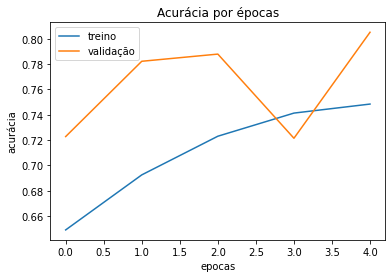

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

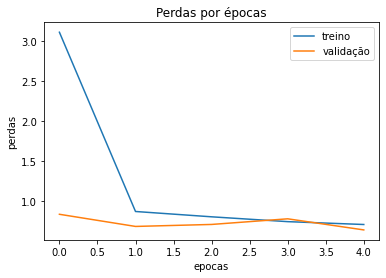

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

### Realizando Predição

In [ ]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imagem de teste {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[0])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[0]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 9
número da imagem de teste 9
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 9
Número da imagem de teste modelo salvo 9


In [ ]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[2])}')
print(f'número da imagem de teste {identificacoes_teste[2]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[2])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[2]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 1
número da imagem de teste 1
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 1
Número da imagem de teste modelo salvo 1


In [ ]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[4])}')
print(f'número da imagem de teste {identificacoes_teste[4]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo {np.argmax(testes_modelo_salvo[4])}')
print(f'Número da imagem de teste modelo salvo {identificacoes_teste[4]}')

313/313 [==============================] - 1s 2ms/step
Resultado teste 6
número da imagem de teste 6
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo 6
Número da imagem de teste modelo salvo 6


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste {perda_teste}')
print(f'Ácuracia do teste {acuracia_teste}')

313/313 [==============================] - 1s 3ms/step - loss: 0.6636 - accuracy: 0.7989
Perda do teste 0.6635791659355164
Ácuracia do teste 0.7989000082015991


# Estudo 02 - Retroporpagação ou Backpropagation

O backpropagation é indiscutivelmente o algoritmo mais importante na história das redes neurais. Sendo o algoritmo-chave que faz o treinamento de modelos profundos algo computacionalmente tratável. Para as `redes neurais modernas`, ele pode tornar o treinamento com gradiente descendente até dez milhões de vezes mais rápido, em relação a uma implementação ingênua. Essa é a diferença entre um modelo que leva algumas horas ou dias para treinar e e outro que poderia levar anos.

Fundamentalmente, backpropagation é uma técnica para calcular derivadas rapidamente. E é um truque essencial, não apenas em Deep Learning, mas em uma ampla variedade de situações de computação numérica.

## Sumário do Modelo

In [ ]:
# NEW -------------
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# NEW ------------
# pesos multiplicam para saber se o estamos proximos do resultado
pesos_camada_dense = modelo.layers[1].get_weights()[0]

# vieses mostram se estamos próximos ou longe do resultado esperado
vieses_camada_dense = modelo.layers[1].get_weights()[1]

## Realizando alteracoes nos pesos

In [ ]:
pesos_camada_dense.shape

(784, 256)

In [ ]:
# criando array zerada do mesmo tamanho do 'pesos_camada_dense'
pesos_camada_dense_zerados = np.zeros((784,256))

# comitando a array zerada
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)

# copilando o modelo
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 1.1851 - accuracy: 0.5557 - val_loss: 0.7317 - val_accuracy: 0.7284
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9744 - accuracy: 0.6099 - val_loss: 0.7013 - val_accuracy: 0.7240
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9297 - accuracy: 0.6300 - val_loss: 0.7146 - val_accuracy: 0.6907
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9058 - accuracy: 0.6374 - val_loss: 0.7375 - val_accuracy: 0.7243
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9184 - accuracy: 0.6365 - val_loss: 0.7465 - val_accuracy: 0.7144


In [ ]:
# para visualizar o modelo
# modelo.layers[1].get_weights()

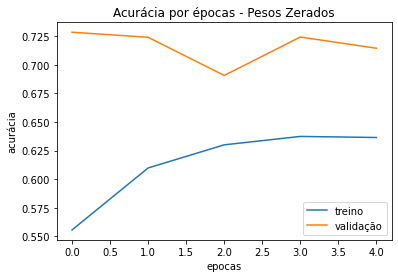

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos Zerados')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

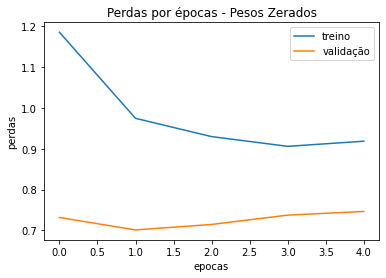

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos Zerados')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

In [ ]:
# criando array aleatório para os pesos
pesos_camada_dense_aleatorios = np.random.rand(784,256)

# comitando a array aleatório
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

# copilando o modelo pesos aleatório
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 10630.2168 - accuracy: 0.4093 - val_loss: 2253.1426 - val_accuracy: 0.6811
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2403.8469 - accuracy: 0.6016 - val_loss: 779.0531 - val_accuracy: 0.6935
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1042.1455 - accuracy: 0.6420 - val_loss: 660.5844 - val_accuracy: 0.6914
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 553.5878 - accuracy: 0.6773 - val_loss: 342.6623 - val_accuracy: 0.7443
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 298.8294 - accuracy: 0.7197 - val_loss: 186.4992 - val_accuracy: 0.7250


In [ ]:
# para visualizar o modelo
# modelo.layers[1].get_weights()

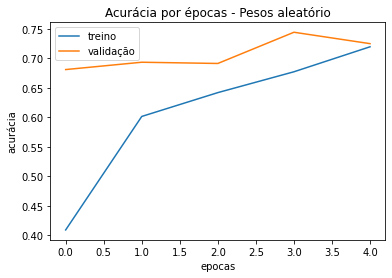

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos aleatório')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

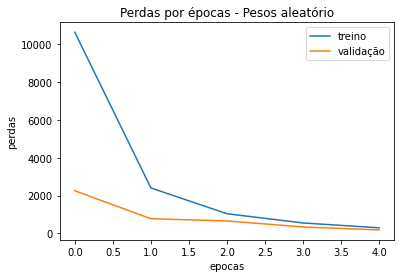

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos aleatório')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

In [ ]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

### Realizando alteracoes nos vieses

In [ ]:
vieses_camada_dense.shape

(256,)

#### Pesos e Vieses Zerados

In [ ]:
# zerando os vieses de acordo com o tamanho do 'vieses_camada_dense'
vieses_camada_dense_zeradas = np.zeros((256,))

# comitando os vieses zerados
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zeradas]
)

# copilando o modelo
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.8645 - accuracy: 0.1011 - val_loss: 2.5557 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.4290 - accuracy: 0.1011 - val_loss: 2.3524 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3220 - accuracy: 0.1011 - val_loss: 2.3064 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3036 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3030 - val_accuracy: 0.0957


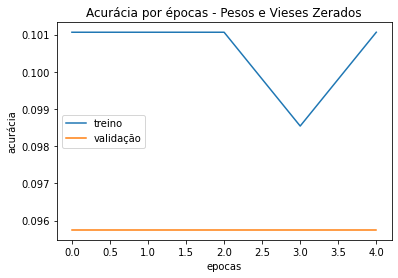

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

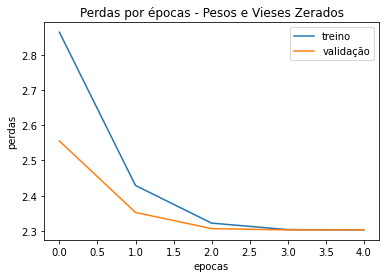

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

#### Pesos Aleatórios e Vieses Zerados

In [ ]:
# zerando os vieses de acordo com o tamanho do 'vieses_camada_dense'
vieses_camada_dense_zeradas = np.zeros((256,))

# comitando os vieses zerados
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zeradas]
)

# copilando o modelo
modelo.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2245.7351 - accuracy: 0.3708 - val_loss: 1248.4030 - val_accuracy: 0.5478
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 814.2393 - accuracy: 0.5676 - val_loss: 705.7284 - val_accuracy: 0.5867
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 456.0718 - accuracy: 0.6546 - val_loss: 385.0268 - val_accuracy: 0.7636
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 218.2952 - accuracy: 0.7121 - val_loss: 109.3072 - val_accuracy: 0.7674
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 81.3555 - accuracy: 0.7449 - val_loss: 43.3378 - val_accuracy: 0.8165


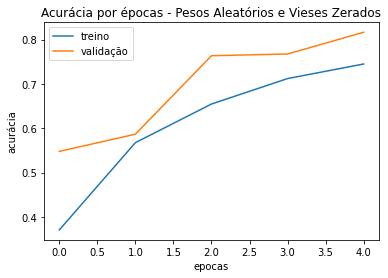

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

#informações extras
plt.title('Acurácia por épocas - Pesos Aleatórios e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

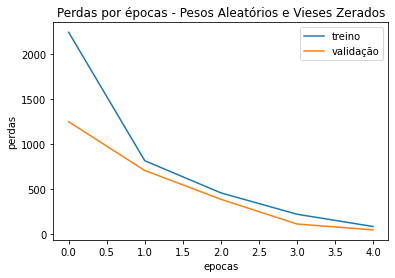

In [ ]:
# plots dados do hitorico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

#informações extras
plt.title('Perdas por épocas - Pesos Aleatórios e Vieses Zerados')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

## Estudandos o Hiperparâmetros do ADAM 

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2), # 20% das unidades adormecidos
    keras.layers.Dense(10, activation= 'softmax') 
])
# 
adam = keras.optimizers.Adam( learning_rate= 0.001
                              )

# copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 3.5568 - accuracy: 0.6493 - val_loss: 0.7162 - val_accuracy: 0.7387
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8384 - accuracy: 0.6944 - val_loss: 0.6874 - val_accuracy: 0.7529
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7986 - accuracy: 0.7111 - val_loss: 0.6011 - val_accuracy: 0.7663
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7752 - accuracy: 0.7216 - val_loss: 0.5681 - val_accuracy: 0.8210
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7483 - accuracy: 0.7383 - val_loss: 0.5937 - val_accuracy: 0.8129


In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2), # 20% das unidades adormecidos
    keras.layers.Dense(10, activation= 'softmax') 
])
# 
adam = keras.optimizers.Adam( learning_rate= 0.05
                              )

# copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(imagens_treino, identificacoes_treino,
           epochs = 5, # realizar o treino 5 vezes
           validation_split = 0.2 # dados das perda e da acurácia validados
           )

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 40.8932 - accuracy: 0.1034 - val_loss: 2.3265 - val_accuracy: 0.1042
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3340 - accuracy: 0.1019 - val_loss: 2.3257 - val_accuracy: 0.1029
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3097 - accuracy: 0.0993 - val_loss: 2.3261 - val_accuracy: 0.1003
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3091 - accuracy: 0.1015 - val_loss: 2.3284 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3094 - accuracy: 0.0999 - val_loss: 2.3269 - val_accuracy: 0.1003


In [ ]:
# Estudo de hiperparâmetros
## 
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax') 
])

## adpatando os hiperparâmetros do 'Adam'
adam = keras.optimizers.Adam( learning_rate= 0.05,  # taxa de aprendizado
                              )

## copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(
              imagens_treino, identificacoes_treino,
              epochs = 5,               # realizar o treino 5 vezes
              validation_split = 0.2,   # dados das perda e da acurácia validados
              batch_size = 480          # quantidades de imagens passadas por vez
            )

Epoch 1/5
100/100 [==============================] - 2s 18ms/step - loss: 329.1506 - accuracy: 0.1802 - val_loss: 2.1449 - val_accuracy: 0.1943
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 2.1263 - accuracy: 0.1795 - val_loss: 2.0833 - val_accuracy: 0.2198
Epoch 3/5
100/100 [==============================] - 2s 17ms/step - loss: 2.1405 - accuracy: 0.1908 - val_loss: 2.1429 - val_accuracy: 0.1965
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 2.1535 - accuracy: 0.1964 - val_loss: 2.1023 - val_accuracy: 0.2112
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 2.0887 - accuracy: 0.2016 - val_loss: 2.0203 - val_accuracy: 0.2501


In [ ]:
# Estudo de hiperparâmetros
## 
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax') 
])

## adpatando os hiperparâmetros do 'Adam'
adam = keras.optimizers.Adam( learning_rate= 0.002,  # taxa de aprendizado
                              )

## copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(
              imagens_treino, identificacoes_treino,
              epochs = 5,               # realizar o treino 5 vezes
              validation_split = 0.2,   # dados das perda e da acurácia validados
              batch_size = 480          # quantidades de imagens passadas por vez
            )

Epoch 1/5
100/100 [==============================] - 3s 22ms/step - loss: 19.5644 - accuracy: 0.6059 - val_loss: 1.1349 - val_accuracy: 0.7185
Epoch 2/5
100/100 [==============================] - 2s 17ms/step - loss: 1.0750 - accuracy: 0.7000 - val_loss: 0.7566 - val_accuracy: 0.7609
Epoch 3/5
100/100 [==============================] - 2s 17ms/step - loss: 0.8407 - accuracy: 0.7292 - val_loss: 0.6986 - val_accuracy: 0.7862
Epoch 4/5
100/100 [==============================] - 2s 17ms/step - loss: 0.7446 - accuracy: 0.7470 - val_loss: 0.6384 - val_accuracy: 0.7934
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 0.6779 - accuracy: 0.7641 - val_loss: 0.6016 - val_accuracy: 0.8079


In [ ]:
# Estudo de hiperparâmetros
## 
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax') 
])

## adpatando os hiperparâmetros do 'Adam'
adam = keras.optimizers.Adam( learning_rate= 0.5,  # taxa de aprendizado
                              )

## copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(
              imagens_treino, identificacoes_treino,
              epochs = 5,               # realizar o treino 5 vezes
              validation_split = 0.2,   # dados das perda e da acurácia validados
              batch_size = 480          # quantidades de imagens passadas por vez
            )

Epoch 1/5
100/100 [==============================] - 2s 18ms/step - loss: 14199.7012 - accuracy: 0.1176 - val_loss: 4.0948 - val_accuracy: 0.1044
Epoch 2/5
100/100 [==============================] - 2s 16ms/step - loss: 2.5699 - accuracy: 0.1092 - val_loss: 17.2278 - val_accuracy: 0.1087
Epoch 3/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3366 - accuracy: 0.1070 - val_loss: 16.6387 - val_accuracy: 0.1095
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3122 - accuracy: 0.1047 - val_loss: 16.6394 - val_accuracy: 0.1049
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 2.3006 - accuracy: 0.1035 - val_loss: 16.6390 - val_accuracy: 0.1071


In [ ]:
# Estudo de hiperparâmetros
## 
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)), 
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax') 
])

## adpatando os hiperparâmetros do 'Adam'
adam = keras.optimizers.Adam( learning_rate= 0.002,  # taxa de aprendizado
                              )
## Retorno e/ou Parada
callbacks = [keras.callbacks.EarlyStopping( # métrica a ser monitorado
                                            monitor = 'val_loss',  
                                            # Número de épocas sem melhora depois do qual o treinamento será interrompido 
                                            patience = 1),         
             keras.callbacks.ModelCheckpoint(
                                            # nome arquivo
                                            filepath = 'melhor_modelo.hdf5',
                                            # métrica a ser monitorado
                                            monitor = 'val_loss',
                                            # modelo considerado o melhor
                                            save_best_only = True)
             ]

## copilando o modelo
modelo.compile(
    optimizer= adam,
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

# gravando resultado
historico = modelo.fit(
              imagens_treino, identificacoes_treino,
              epochs = 5,               # realizar o treino 5 vezes
              validation_split = 0.2,   # dados das perda e da acurácia validados
              batch_size = 100,          # quantidades de imagens passadas por vez
              callbacks = callbacks
            )

Epoch 1/5
480/480 [==============================] - 4s 8ms/step - loss: 5.9482 - accuracy: 0.6091 - val_loss: 0.8315 - val_accuracy: 0.6729
Epoch 2/5
480/480 [==============================] - 4s 7ms/step - loss: 0.8718 - accuracy: 0.6864 - val_loss: 0.6914 - val_accuracy: 0.7460
Epoch 3/5
480/480 [==============================] - 4s 7ms/step - loss: 0.7792 - accuracy: 0.7115 - val_loss: 0.6570 - val_accuracy: 0.7605
Epoch 4/5
480/480 [==============================] - 3s 7ms/step - loss: 0.7247 - accuracy: 0.7316 - val_loss: 0.5732 - val_accuracy: 0.8029
Epoch 5/5
480/480 [==============================] - 4s 8ms/step - loss: 0.7125 - accuracy: 0.7411 - val_loss: 0.6450 - val_accuracy: 0.7916


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
